# Hvor raskt kan vi få et Maglev tog opp i høyere hastighet en Apollo 10? Og er det mulig?

*Et Computational Essay av Brage A. Trefjord og Sigurd Vargdal, studenter ved Universitetet i Oslo.*

## Introduksjon

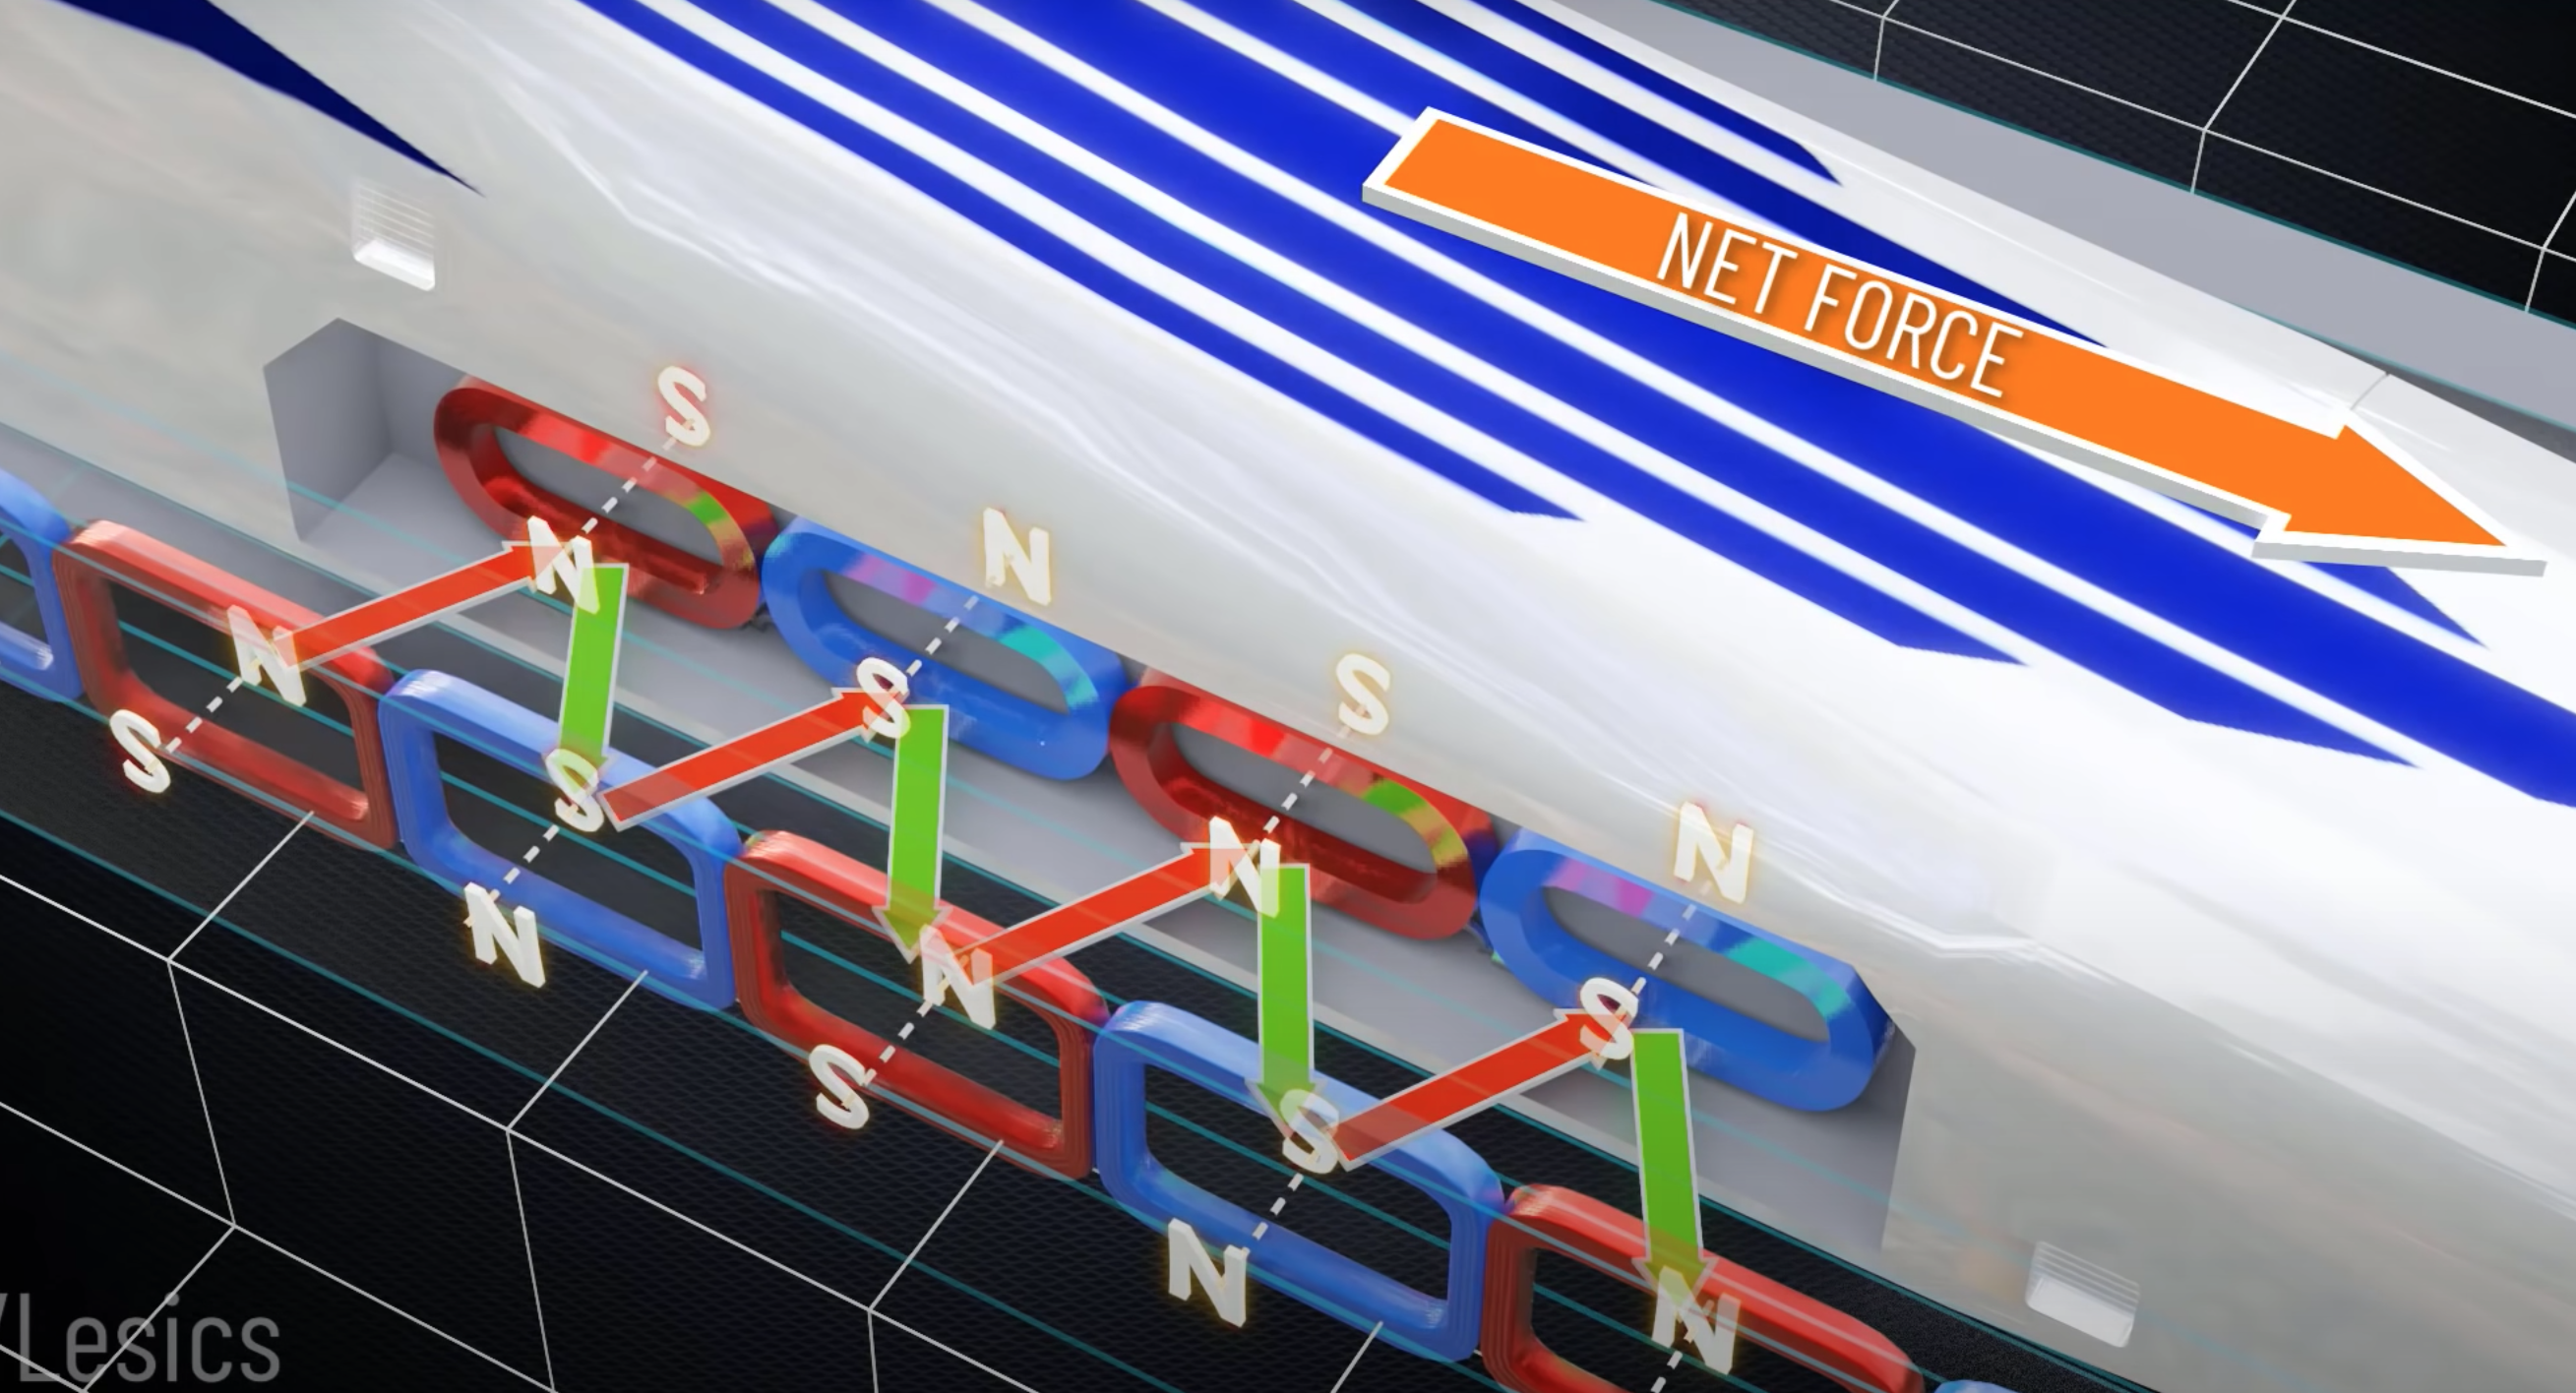

Maglev står for "Magnetisk levitasjon" [[1]](#MaglevWiki), og toget har fått navnet fordi den bruker magnetiske krefter til å levitere toget (altså få det til å "fly" lavt over bakken). Siden toget leviterer, har den svært lite friksjon, noe som gjør det mulig å komme opp i store hastigheter. Toget består av superledere, som leder strøm med null motstand, og denne strømmen setter opp et magnetfelt. Toget består av mange slike magnetfelt på hver side av toget. Skinnene toget befinner seg på består av mange spoler, som leder strøm og danner magnetfelt. Disse spolene er plassert slik at magnetfeltet de danner dytter mot magnetfeltet fra togets superledere, og dermed dytter toget framover. På denne måten blir superlederene på toget "hjulene" til toget, som sørger for at toget beveger seg framover.

I skinnene har vi også elektriske ledere formet som åtte tall, som ikke har noe strøm gjennom seg. Når toget beveger seg framover forbi disse lederene vil magnetfeltet fra toget indusere en strøm i lederene som igjen skaper et motstridende magnetisk felt. Dette feltet dytter toget oppover, dersom det kommer for lavt. Det er på denne måten toget leviterer. Siden toget er nødt til å bevege seg før den begynner å levitere, vil det til å begynne med ha faktiske hjul for å kunne sette i gang bevegelsen, og begynne å akselerere framover. Så snart toget beveger seg raskt nok til å begynne å levitere, trekkes hjulene inn.

De åttetalls-formede lederene er også koblet i par, slik at hver leder er koblet til lederen på motsatt side av toget. Dersom toget beveger seg mot den ene siden vil det bli indusert mer strøm i lederen på denne siden, enn på motsatt side. Siden de to lederne er koblet sammen vil den induserte strømmen gå mellom de to lederene, og føre til en forskjell i det magnetiske feltet fra hver side. Denne forskjellen i feltet skaper en magnetisk kraft på toget som dytter den tilbake mot midten av sporet. På denne måten holder toget seg stabilt i midten under togturen, og kræsjer dermed ikke inn i sidene.

I 2015 klarte et japansk Maglev tog å nå opp i $603$ km/h [[2]](#MaglevRecord), eller $167.5$ m/s, som er det raskeste et Maglev tog har oppnådd [[3]](#MaglevRecords). I vår oppgave ønsker vi å slå denne rekorden (og ikke bare slå den, men gruse den totalt). Vi ønsker å simulere et Maglev tog som beveger seg raskere enn noe menneske har bevegd seg før. Ifølge Guinness World Records [[4]](#test) er verdensrekorden for den største hastigheten noe menneske har oppnådd, $39\,937.7$ km/h $\approx 11\,093.8$ m/s. Denne imponerende hastigheten ble gjort av Apollo 10. For å slå denne rekorden skal vi bruke Maglevtoget vårt, og forsøke å få det opp i en hastighet på $11\,100$ m/s. Vi ønsker å finne ut om dette er mulig, og hvor lang tid det vil ta under gitte antagelser. Denne oppgaven er inspirert av, og vil i stor grad basere seg på følgende video: https://www.youtube.com/watch?v=XjwF-STGtfE

Undersøkende spørsmål:
"Hvordan kan et tog drevet av magnetfeltet oppnå en hastighet på 11100 m/s"

<ipython-input-28-b56c91a98476>:11: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "spole_plot" failed type inference due to: Untyped global name 'ax': Cannot determine Numba type of <class 'matplotlib.axes._subplots.Axes3DSubplot'>

File "<ipython-input-28-b56c91a98476>", line 18:
def spole_plot(r,theta):
    <source elided>

    ax.plot(x-r/2, y, z)
    ^

  @jit
c:\users\elev\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "spole_plot" was compiled in object mode without forceobj=True.

File "<ipython-input-28-b56c91a98476>", line 12:
@jit
def spole_plot(r,theta):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
c:\users\elev\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is depre

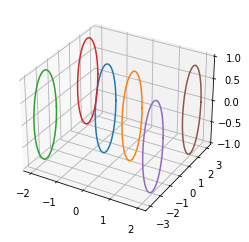

In [28]:
#simulering av spolenes posisjon i rommet.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

@jit
def spole_plot(r,theta):

    y = r*np.cos(theta)
    z = r*np.sin(theta)
    x = np.zeros_like(y)

    ax.plot(x-r/2, y, z)
    ax.plot(x+r/2, y, z)

    ax.plot(x-2, y-2, z)
    ax.plot(x-2, y+2, z)


    ax.plot(x+2, y-2, z)
    ax.plot(x+2, y+2, z)
    return

r = 1
theta = np.linspace(0, 2 * np.pi, 201)
spole_plot(r,theta)
plt.show()

## Simpel modell

## Teori

Bio Savarts lov:
$$\vec{B}(\vec{r})=\frac{\mu_0 \vec{I}x\hat{R}}{4 \pi R^2}$$

På integralform:
$$\vec{B}(\vec{r})=\oint_C \frac{\mu_0 Id\vec{l}x\hat{R}}{4 \pi R^2}$$

Feltet for en sirkulær leder med strømstyrke $I$ blir først for et lite strømelement $d\vec{l}$:
$$d\vec{B} = \frac{\mu_0 Id\vec{l}x\hat{R}}{4\pi R^2}$$
Et av disse linjeelementene $d\vec{l}$ vil være bare på sirklene og derfor bare havhenge av $\theta$. Dette gir os at vi får $d\vec{l}=ad\theta \hat{\theta}$. Dette vi si at når vi i Bio Savarts lov går over linjeelementene er det magnetsike feltet som settes opp av strømmen $I$, bare gå over sirkelen til spolen vi har definert.

For å definere uttrykket for alle disse linjelementenes påvirkning på feltet må vi finner vi:
$$\vec{B}=\oint_C d\vec{B}$$
Denne lukkede kurven C vil altså være det som blir spolen.

In [29]:
#simuleringav et magnetfelt:
def bfield(r,I,a,c):
    B = np.zeros(3)
    N=100
    theta = np.linspace(0,2*np.pi,N)
    
    for i in range(N):
        ri = np.array([c[0],c[1]+a*np.cos(theta[i]),c[2]+a*np.sin(theta[i])])
        dli = np.array([c[0],-a*np.sin(theta[i]),+a*np.cos(theta[i])])
        R = r-ri
        Rnorm = np.linalg.norm(R)
        Runit = R/Rnorm
        dB = I*np.cross(dli,Runit)/(4*np.pi*Rnorm**2)
        B = B+dB
    return B
r = 0
I=1
a=1
center = [np.array([1,0,0]),np.array([-1,0,0]),np.array([3,2,0]),np.array([3,-2,0]),np.array([-3,2,0]),np.array([-3,-2,0])]
def B_total(r):
    return (bfield(r,-I,a,center[0])+bfield(r,-I,a,center[1]) +bfield(r,-I,a,center[2])+bfield(r,I,a,center[3])
                                +bfield(r,I,a,center[4])+bfield(r,-I,a,center[5]))

In [30]:
L = 5
NL = 30
x = np.linspace(-L,L,NL)
y = np.linspace(-L,L,NL)
#z = np.linspace(-L,L,NL)
rx,ry = np.meshgrid(x,y)
Bx = rx.copy()
By = ry.copy()

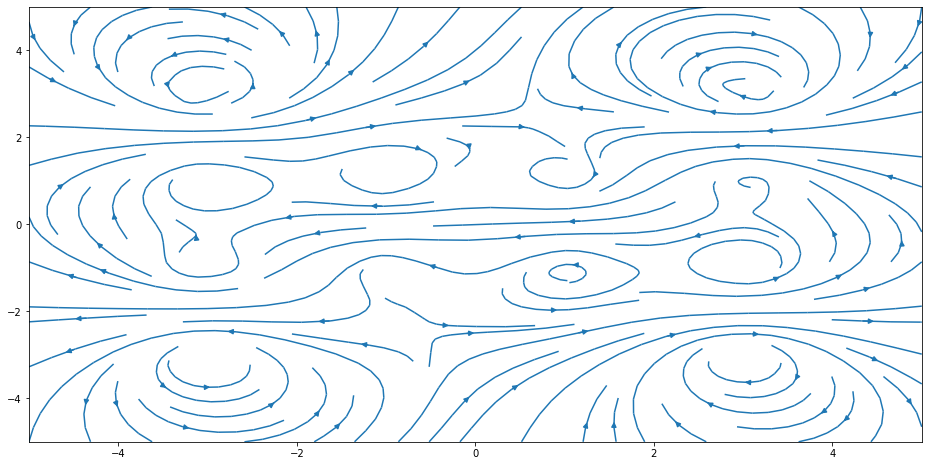

In [31]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],By.flat[i],Bz = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

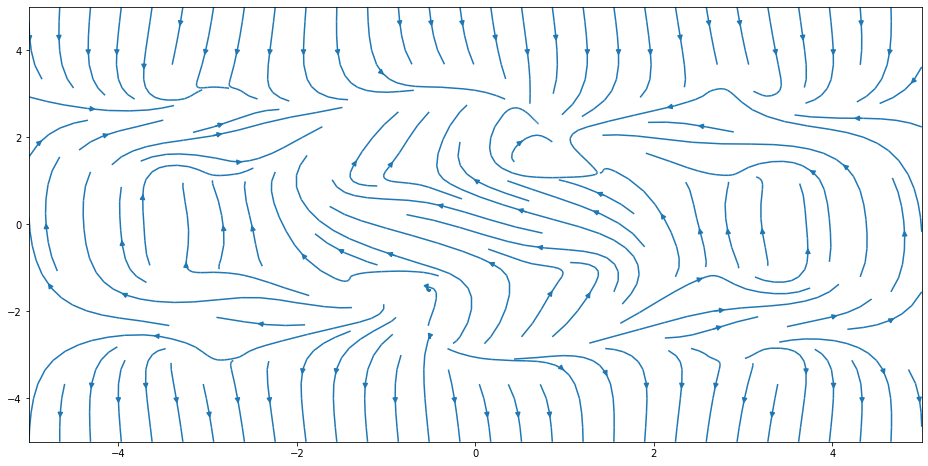

In [32]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],Bz,By.flat[i] = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

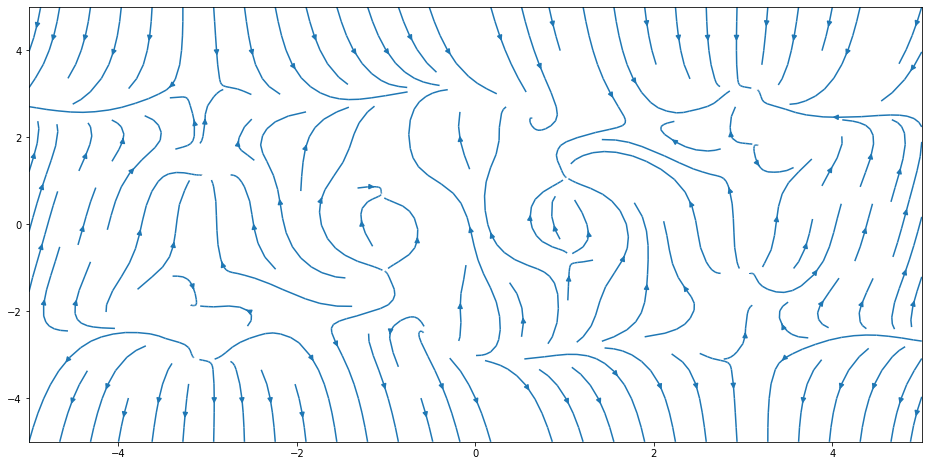

In [33]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bz,Bx.flat[i],By.flat[i] = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

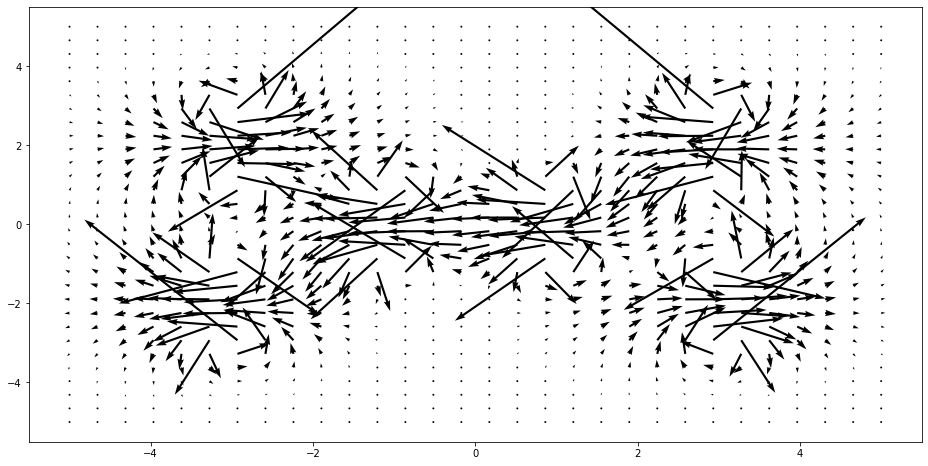

In [34]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],By.flat[i],Bz = B_total(r)
plt.figure(figsize=(16,8))
plt.quiver(x,y,Bx,By)

## Kraft funksjon:

In [35]:
@jit
def F_B(I,a,c,d1,d2,d3,d4):
    F = 0

    N=100

    theta = np.linspace(0,2*np.pi,N)
    
    for i in range(N):
        dli = np.array([c[0],c[1]-a*np.sin(theta[i]),c[2]+a*np.cos(theta[i])]) #vektoren til hver linjeelement på toget

        B = bfield(dli,I,a,d1)+bfield(dli,-I,a,d2)+bfield(dli,I,a,d3)+bfield(dli,-I,a,d4) #definerer Den magnetiske feltet

        dF = I*np.cross(dli,B) #Kraft komponenten til hvert linjeelement

        F = F + dF #summer opp alle kraftkomponentene
    
    return F

In [36]:
#definerer spolene på skinnene
d1 = np.array([2,-1,0])
d2 = np.array([2,1,0])
d3 =np.array([2,3,0])
d4 =np.array([2,-3,0])

In [37]:
I = 1
a = 1
m = 1
dt = 0.01
v = 0
p = 0
q=0

<ipython-input-35-13da0f8a7483>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "F_B" failed type inference due to: Untyped global name 'bfield': Cannot determine Numba type of <class 'function'>

File "<ipython-input-35-13da0f8a7483>", line 12:
def F_B(I,a,c,d1,d2,d3,d4):
    <source elided>

        B = bfield(dli,I,a,d1)+bfield(dli,-I,a,d2)+bfield(dli,I,a,d3)+bfield(dli,-I,a,d4) #definerer Den magnetiske feltet
        ^

  @jit
<ipython-input-35-13da0f8a7483>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "F_B" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-35-13da0f8a7483>", line 9:
def F_B(I,a,c,d1,d2,d3,d4):
    <source elided>
    
    for i in range(N):
    ^

  @jit
c:\users\elev\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarni


    a = 0.0033076624668720448 m/s^2
    v = 3.307662466872045e-05 m/s
    q = 0<3.3076624668720453e-07<2 m 
    p = 3.3076624668720453e-07 m
    


<ipython-input-35-13da0f8a7483>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "F_B" failed type inference due to: Untyped global name 'bfield': Cannot determine Numba type of <class 'function'>

File "<ipython-input-35-13da0f8a7483>", line 12:
def F_B(I,a,c,d1,d2,d3,d4):
    <source elided>

        B = bfield(dli,I,a,d1)+bfield(dli,-I,a,d2)+bfield(dli,I,a,d3)+bfield(dli,-I,a,d4) #definerer Den magnetiske feltet
        ^

  @jit
<ipython-input-35-13da0f8a7483>:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "F_B" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-35-13da0f8a7483>", line 9:
def F_B(I,a,c,d1,d2,d3,d4):
    <source elided>
    
    for i in range(N):
    ^

  @jit
c:\users\elev\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarni


    a = -4.4294094974697326e-08 m/s^2
    v = 3.30761817277707e-05 m/s
    q = 0<3.3076181727770706e-07<2 m 
    p = 6.615280639649115e-07 m
    

    a = -7.943452015229041e-18 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 9.922898812426178e-07 m
    

    a = -2.5546779773022625e-37 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 1.323051698520324e-06 m
    

    a = -2.6423475472771564e-76 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 1.6538135157980303e-06 m
    

    a = -2.8268156739860423e-154 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 1.9845753330757364e-06 m
    

    a = -3.2352853618148e-310 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 2.3153371503534427e-06 m
    

    a = 0.0 m/s^2
    v = 3.307618172777062e-05 m/s
    q = 0<3.307618172777062e-07<2 m 
    p = 2.646098967631149e-

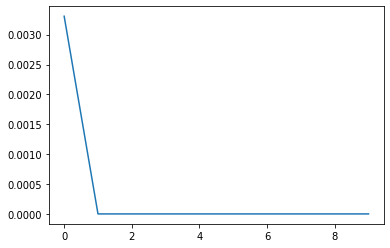

In [38]:
t = []
pos = []
i=0
while v <=11100 and i<10:
    c = np.array([0,q,0])
    a = F_B(I,a,c,d1,d2,d3,d4)[1]/m
    v += a*dt
    p += v*dt
    q += v*dt
    if c[1]> 2:
        q=0
    else:
        q=v*dt
    pos.append(a)
    t.append(i)
    # print(F_B(r,I,a,c,d1,d2,d3,d4))
    print(f"""
    a = {a} m/s^2
    v = {v} m/s
    q = 0<{q}<2 m 
    p = {p} m
    """)
    i +=1

plt.plot(t,pos)
plt.show()

## Kilder:


<a id=MaglevWiki>[1]</a> https://en.wikipedia.org/wiki/Maglev (Hentet 06.11.2021)

<a id=MaglevRecord>[2]</a> https://www.theguardian.com/world/2015/apr/21/japans-maglev-train-notches-up-new-world-speed-record-in-test-run (Hentet 06.11.2021)

<a id="MaglevRecords">[3]</a> https://en.wikipedia.org/wiki/Maglev#History_of_maglev_speed_records (Hentet 06.11.2021)

<a id="test">[4]</a> https://www.guinnessworldrecords.com/world-records/66125-fastest-speed-achieved-by-humans" (Hentet 06.11.2021)